In [1]:
# ============================================
# Task 1: Brent Oil Price Analysis Foundation
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

plt.style.use("seaborn-v0_8-darkgrid")


In [5]:
# Load data
df = pd.read_csv("../data/raw/BrentOilPrices.csv")

df["Date"] = pd.to_datetime(df["Date"], format='mixed', dayfirst=True)
df = df.sort_values("Date").reset_index(drop=True)

df.head()


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


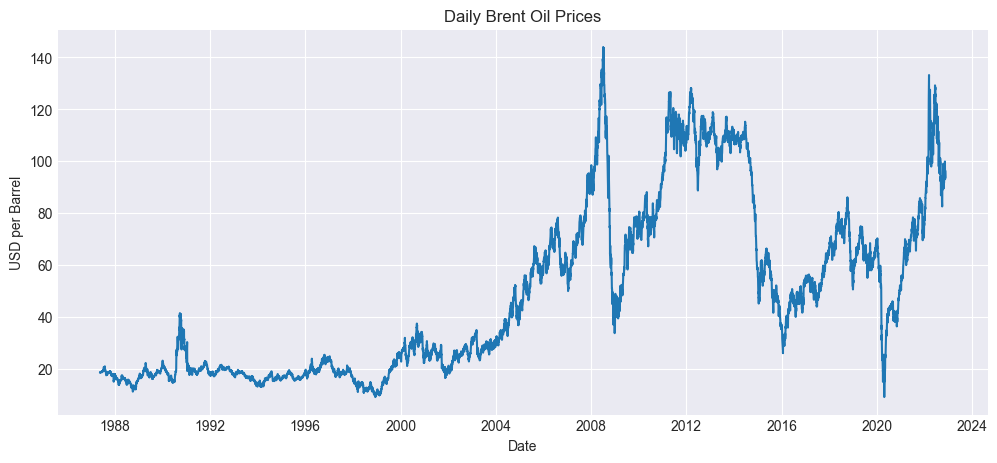

In [6]:
# Plot raw price series
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Price"])
plt.title("Daily Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("USD per Barrel")
plt.show()


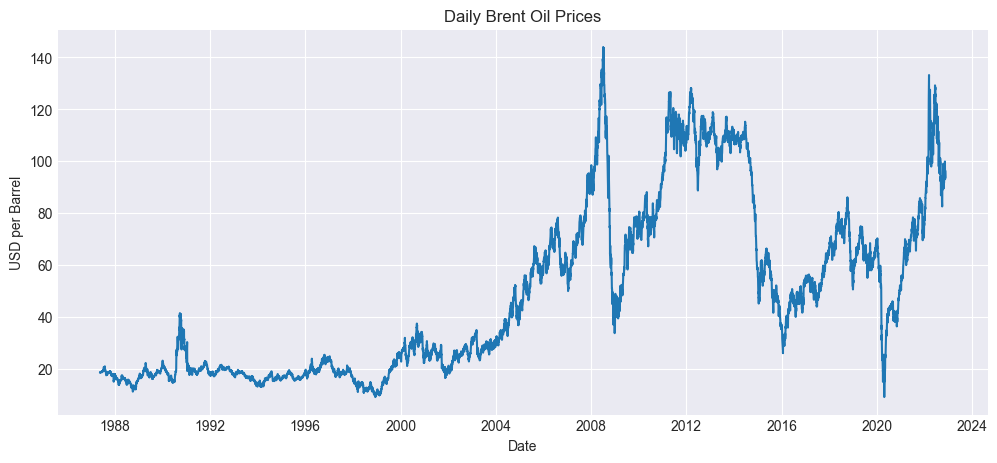

In [7]:
# Plot raw price series
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Price"])
plt.title("Daily Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("USD per Barrel")
plt.show()


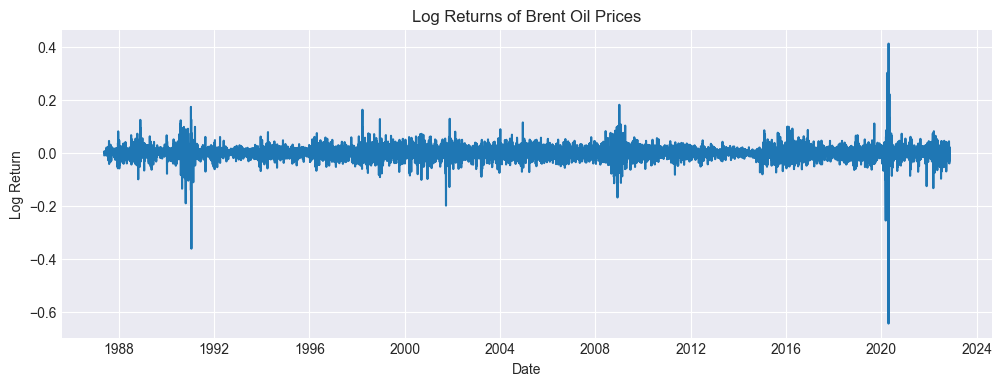

In [8]:
# Compute log returns
df["log_return"] = np.log(df["Price"]).diff()
df.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["log_return"])
plt.title("Log Returns of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()


In [9]:
# Stationarity test (ADF)
adf_result = adfuller(df["log_return"])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Log returns are stationary (reject H0).")
else:
    print("Log returns are non-stationary (fail to reject H0).")


ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29
Log returns are stationary (reject H0).


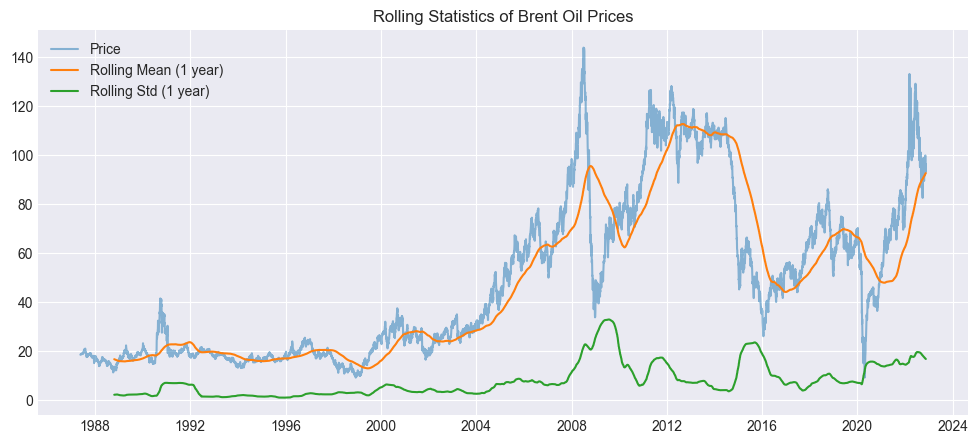

In [10]:
# Rolling statistics to observe regime changes
df["rolling_mean"] = df["Price"].rolling(window=365).mean()
df["rolling_std"] = df["Price"].rolling(window=365).std()

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Price"], alpha=0.5, label="Price")
plt.plot(df["Date"], df["rolling_mean"], label="Rolling Mean (1 year)")
plt.plot(df["Date"], df["rolling_std"], label="Rolling Std (1 year)")
plt.legend()
plt.title("Rolling Statistics of Brent Oil Prices")
plt.show()


In [11]:
# Load event data
events = pd.read_csv("../data/processed/events2.csv")
events["date"] = pd.to_datetime(events["date"])

events


,date,event,category
0,1990-08-02,Gulf War invasion of Kuwait,Geopolitical Conflict
1,1997-07-02,Asian Financial Crisis,Economic Shock
2,2001-09-11,9/11 attacks in the United States,Geopolitical Shock
3,2003-03-20,US-led invasion of Iraq,Geopolitical Conflict
4,2008-09-15,Global Financial Crisis,Economic Shock
5,2010-12-17,Arab Spring begins,Geopolitical Conflict
6,2014-11-27,OPEC decision not to cut production,OPEC Policy
7,2016-11-30,OPEC production cut agreement,OPEC Policy
8,2020-03-11,COVID-19 declared a pandemic,Global Health Shock
9,2020-04-20,Oil price collapse due to demand crash,Economic Shock


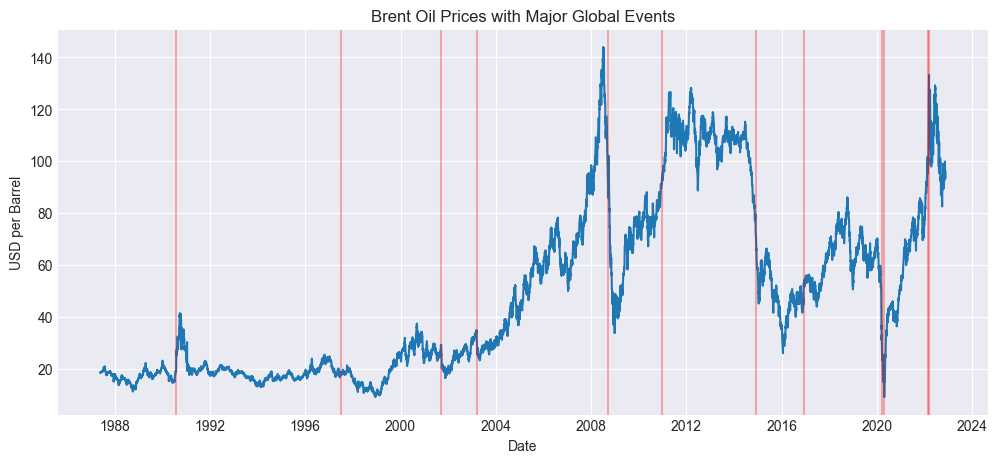

In [12]:
# Visual alignment of events with price data
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Price"], label="Brent Price")

for _, row in events.iterrows():
    plt.axvline(row["date"], color="red", alpha=0.3)

plt.title("Brent Oil Prices with Major Global Events")
plt.xlabel("Date")
plt.ylabel("USD per Barrel")
plt.show()


📌 Assumptions and Limitations

(This section goes directly into your Task 1 document)

Assumptions

Market efficiency (weak form)
Brent oil prices are assumed to reflect publicly available information, including geopolitical events, OPEC decisions, and economic shocks.

Structural breaks reflect regime changes
Sudden changes in price behavior are assumed to represent shifts in market regimes (e.g., supply shocks, demand collapses, policy changes).

Log returns are approximately stationary
While raw oil prices are non-stationary, log returns are assumed to be sufficiently stationary for statistical modeling.

Event dates are approximate
Geopolitical and policy events are represented by their announcement or start dates, acknowledging that market anticipation or delayed reactions may occur.

Limitations

Correlation vs. Causation (Crucial Distinction)

Statistical correlation in time means that a detected change point occurs around the same time as a known event.

Causal impact would require proof that the event directly caused the price change, ruling out all other explanations.

🔹 This analysis does not prove causality.
🔹 It identifies temporal alignment, not cause-and-effect.

To prove causality, additional methods would be required, such as:

Counterfactual modeling

Control variables (macroeconomic indicators)

Natural experiments or instrumental variables

Confounding factors
Oil prices are influenced by multiple overlapping factors (exchange rates, demand expectations, speculation), which are not explicitly modeled here.

Single-series focus
The analysis focuses solely on Brent oil prices and does not include explanatory variables such as GDP, inflation, or inventories.

Model sensitivity
Change point results depend on model assumptions, priors, and distributional choices.
A Bayesian change point model assumes that the time series is generated by different statistical regimes.
Each regime has its own parameters (e.g., mean and variance), and the change point represents the time at which the data-generating process shifts.

The primary outputs are:

A posterior distribution over the change point location

Posterior distributions of parameters before and after the change

Credible intervals that quantify uncertainty

📢 Communication Channels and Formats

(Required by Task 1 — often forgotten, but graded)

Stakeholder	Channel	Format
Policymakers	Policy brief	PDF report with executive summary
Investors & Analysts	Dashboard	Interactive web dashboard
Energy Companies	Technical report	Detailed PDF with charts
Academic / Internal Review	Jupyter Notebook	Reproducible analysis
General Stakeholders	Presentation	Slides with visuals

Key Principle:
Uncertainty and probabilistic results are communicated clearly—no deterministic claims.